In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

# 学習用データ。xが入力、yが出力(答え)です。
 
x = np.array([[10,20,30], [20,30,40], [30, 40, 50], [40, 50, 60]])
y = np.array([[40, 50], [50, 60], [60, 70], [70, 80]])

# 行列のフォーマット変更。
# LSTMは、入力フォーマットを[サンプルの数, 入力のステップ数(この場合は3), features]とする必要があるためです。
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))

m = Sequential()
m.add(LSTM(50, activation='relu', input_shape=(3, 1)))
m.add(RepeatVector(2))
m.add(LSTM(50, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')

# 学習。時間が少しかかる可能性があります。
m.fit(x, y, epochs=1000, verbose=0)

x_input = np.array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = m.predict(x_input)
print(yhat)


[[[81.41878]
  [92.155  ]]]


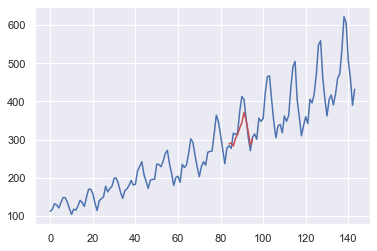

In [4]:
df = pd.read_csv('AirPassengers.csv')
ts = df['#Passengers']

x = [] # train
y = [] # test (answer)
for i in range(0, 72):
    tmpX = []
    for j in range(0, 24):
        tmpX.append(ts[i+j])
    x.append(tmpX)
    
    tmpY = []
    for j in range(0, 12):
        tmpY.append(ts[24+i+j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


m = Sequential()
# 入力データ数が24なので、input_shapeの値が(24,1)です。
#100は分かりやすいよう。
m.add(LSTM(100, activation='relu', input_shape=(24, 1)))
# 予測範囲は12ステップなので、RepeatVectoorに12を指定する必要があります。
m.add(RepeatVector(12)) 
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=0)

input = np.array(ts[60:84]) 
input = input.reshape((1,24,1))
yhat = m.predict(input)
 
# 可視化用に、予測結果yhatを、配列predictに格納
predict = []
for i in range(0, 12):
    predict.append(yhat[0][i])
 
# 比較するために実データをプロット
plt.plot(ts)
 
# 予測したデータをプロット
xdata = np.arange(84, 96, 1)
plt.plot(xdata, predict, 'r')

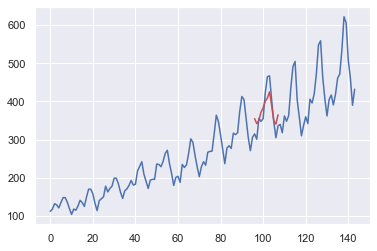

In [5]:
input = np.array(ts[72:96])
input = input.reshape((1,24,1))
yhat = m.predict(input)
 
predict = []
for i in range(0, 12):
    predict.append(yhat[0][i])
 
plt.plot(ts)
xdata = np.arange(96, 108, 1)
plt.plot(xdata, predict, 'r')